In [73]:
import csv
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

analyzer= SentimentIntensityAnalyzer()

readcsv = pd.read_csv('chatlogs.csv', index_col=0)
tribunal_data = pd.DataFrame(readcsv)

# average reports before it went to tribunal
# most toxic player
# ally team or enemy team more toxic?

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [3]:
tribunal_data.head(n=15)

,message,association_to_offender,time,case_total_reports,allied_report_count,enemy_report_count,most_common_report_reason,chatlog_id,champion_name
0,gold 2 zed,enemy,00:00:21,8,0,2,Negative Attitude,1,Udyr
1,IIII,enemy,00:00:27,8,0,2,Negative Attitude,1,Riven
2,nice premade lie :o,enemy,00:00:27,8,0,2,Negative Attitude,1,Udyr
3,ISI,enemy,00:00:28,8,0,2,Negative Attitude,1,Riven
4,smiteless pls,enemy,00:00:43,8,0,2,Negative Attitude,1,Udyr
5,smiteless pls,enemy,00:00:57,8,0,2,Negative Attitude,1,Udyr
6,riven?,enemy,00:01:10,8,0,2,Negative Attitude,1,Udyr
7,report top no help jnh,enemy,00:01:53,8,0,2,Negative Attitude,1,Udyr
8,warded there,enemy,00:08:12,8,0,2,Negative Attitude,1,Udyr
9,K,enemy,00:08:17,8,0,2,Negative Attitude,1,Riven


#### This dataset contains cases scraped from tribunal. Each row corresponds to a case. Each case goes up for review from other players to the punishment the player deserves. Source - https://www.kaggle.com/simshengxue/league-of-legends-tribunal-chatlogs

#### This is a simple data analysis mainly about toxicity of league of legend players. As tribunal was disabled since early 2014, the conclusions found may not be relevant today. One big question I had comes from the running stereotype in the community that Yasuo mains are usually more toxic than other mains and I wanted to put this myth to the test

#### The first big question: Are yasuo mains as toxic as people say? The first instinct I had to finding this out was getting the ratio of Yasuo reports comparatively to other champions. But as this variable may be skewed due to different release date (Yasuo was released late 2013), it might not be the most reliable metric. I decided on trying a word sentiment analysis of each champion. To do this, I clean the data by first removing stopwords.

In [7]:
def stopword_remover(message):
    removed_special_chars = re.sub('[^A-Za-z]+', ' ', str(message))
    text_tokens = word_tokenize(removed_special_chars)
    parsed_list = [word for word in text_tokens if not word in stopwords.words('english')]
    return ' '.join(parsed_list)

copy_tribunal_data = tribunal_data.copy()
copy_tribunal_data['message'] = tribunal_data['message'].map(lambda message: stopword_remover(message))

copy_tribunal_data.head(20)

,message,association_to_offender,time,case_total_reports,allied_report_count,enemy_report_count,most_common_report_reason,chatlog_id,champion_name
0,gold zed,enemy,00:00:21,8,0,2,Negative Attitude,1,Udyr
1,IIII,enemy,00:00:27,8,0,2,Negative Attitude,1,Riven
2,nice premade lie,enemy,00:00:27,8,0,2,Negative Attitude,1,Udyr
3,ISI,enemy,00:00:28,8,0,2,Negative Attitude,1,Riven
4,smiteless pls,enemy,00:00:43,8,0,2,Negative Attitude,1,Udyr
5,smiteless pls,enemy,00:00:57,8,0,2,Negative Attitude,1,Udyr
6,riven,enemy,00:01:10,8,0,2,Negative Attitude,1,Udyr
7,report top help jnh,enemy,00:01:53,8,0,2,Negative Attitude,1,Udyr
8,warded,enemy,00:08:12,8,0,2,Negative Attitude,1,Udyr
9,K,enemy,00:08:17,8,0,2,Negative Attitude,1,Riven


##### Now that i've removed the stopwords from the messages, i'll move on to using Vader for the sentiment analysis, and add one more column for each calculated sentiment score

In [8]:
copy_tribunal_data['sentiment_score'] = copy_tribunal_data['message'].apply(lambda message: analyzer.polarity_scores(str(message))['compound'])

In [63]:
copy_tribunal_data.head(5)[['champion_name', 'message', 'sentiment_score']]

,champion_name,message,sentiment_score
0,Udyr,gold zed,0.0000
1,Riven,IIII,0.0000
2,Udyr,nice premade lie,0.4215
3,Riven,ISI,0.0000
4,Udyr,smiteless pls,0.0772


#### Now, champions ranked by sentiment score (the lower, the more toxic)

In [49]:
copy_tribunal_data.groupby('champion_name', as_index=False)['sentiment_score'].mean().sort_values('sentiment_score')

,champion_name,sentiment_score
81,Sion,0.021514
100,Vayne,0.032418
92,Tristana,0.033216
113,Zed,0.035090
68,Poppy,0.035839
17,Draven,0.036176
38,Karthus,0.036441
10,Caitlyn,0.036531
95,Twisted Fate,0.037005
49,Lucian,0.037332


In [65]:
sion_wordcloud = WordCloud(max_words=100, background_color="white").generate(' '.join(copy_tribunal_data[copy_tribunal_data['champion_name'] == 'Sion']['message']))
viktor_wordcloud = WordCloud(max_words=100, background_color="white").generate(' '.join(copy_tribunal_data[copy_tribunal_data['champion_name'] == 'Viktor']['message']))
yasuo_wordcloud = WordCloud(max_words=100, background_color="white").generate(' '.join(copy_tribunal_data[copy_tribunal_data['champion_name'] == 'Yasuo']['message']))
teemo_wordcloud = WordCloud(max_words=100, background_color="white").generate(' '.join(copy_tribunal_data[copy_tribunal_data['champion_name'] == 'Teemo']['message']))
lux_wordcloud = WordCloud(max_words=100, background_color="white").generate(' '.join(copy_tribunal_data[copy_tribunal_data['champion_name'] == 'Lux']['message']))

#### This is the wordcloud for Sion who was rated as having messages with the lowest sentiment score

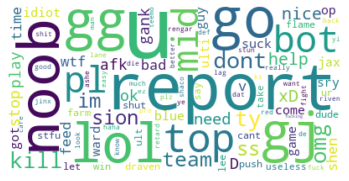

In [59]:
plt.imshow(sion_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### This is the wordcloud for Viktor who was rated as having messages with the highest sentiment score

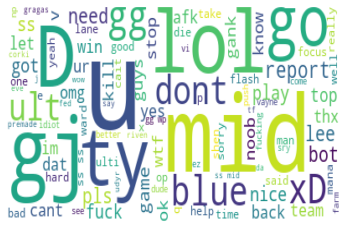

In [60]:
plt.imshow(viktor_wordcloud, interpolation='bilinear', aspect='auto')
plt.axis("off")
plt.show()

#### And finally, Yasuo, who was rated 15th in the toxicity rank

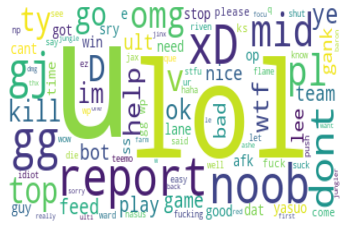

In [61]:
plt.imshow(yasuo_wordcloud, interpolation='bilinear', aspect='auto')
plt.axis("off")
plt.show()

#### Teemo

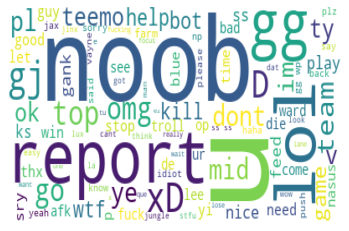

In [67]:
plt.imshow(teemo_wordcloud, interpolation='bilinear', aspect='auto')
plt.axis("off")
plt.show()

#### Lux

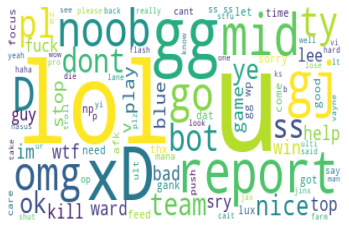

In [66]:
plt.imshow(lux_wordcloud, interpolation='bilinear', aspect='auto')
plt.axis("off")
plt.show()

Conclusion: This analysis was inconclusive as 
1. Sentiment analysis might not work well with league chatlog as much of toxicity in this community is inferred based on context that isn't provided to you unless you were present in the game. As sentiment analysis was built to analyse the positivity/negativity of words, it likely calculated some words wrongly. For example, the word 'Top' contributed to the positivity ratio while it most likely was just referring to the top lane. The variance between sentiment score was suprisingly low. It might be because correlation between champion and the player toxicity is not as much as I previously thought.
2. I removed special characters for the sentiment analysis. I think sentiment analysis takes emojis into account. But I removed them because again most toxicity is inferred. If someone used the :) emoji and he got reported, most likely he was using it in a negative way, while the sentiment analysis would count it as positive
3. I didn't manage to remove some highly used words like 'u' which ruined some of the wordclouds
4. Difference between time of release which make some champs have much less data than others. In theory this should not affect the sentiment analysis, but for the newer champs it might

However, I agree with sion being this most toxic 